#**Import Dependencies**

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

%matplotlib inline


from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
#Loading the data 
df = pd.read_csv('./diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#**Exploratory Data Analysis(EDA)**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#Checking the df shape 
df.shape

(768, 9)

In [6]:
# if total duplicated value
print("Total duplicated value : " , df.duplicated().sum())

Total duplicated value :  0


In [7]:
#Check for clarification if there is duplicated 
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


##**Inference:**
 * Minimum values for many variables are 0.
 * As biological parameters like Glucose, BP, Skin thickness,Insulin & BMI cannot have zero values, looks like null values have been coded as zeros

In [10]:
#Check the null value 
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

How many are Zero values included in each variable?

In [11]:
data = df.copy(deep = True)
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

# Showing the Count of NANs
print(data.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


##**Inference:**

* As Zero Counts , INsulin has the highest number of 0 value ( 374 ) wile SkinThickness appear 0 , 227 times, in a 768 data set, it is better to remove the Zeros uniformly for 5 variables (excl Pregnancies & Outcome)
* Had better replace the 0 value with median value of column Insulin and SkinThickness , yet for the other col with mean 
* Outcome , is not coounted in because it equals to " No diabetes Found in detection" Answer


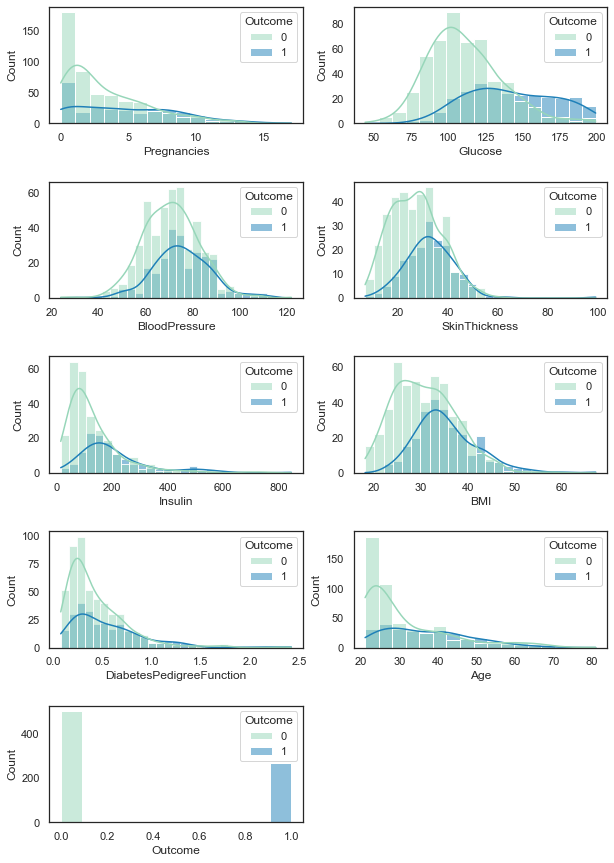

In [12]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 10,15
sns.set(font_scale = 1)
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=0.5)
i = 1;
for name in data.columns:
    plt.subplot(5,2,i)
    sns.histplot(data=data, x=name, hue="Outcome",kde=True,palette="YlGnBu")
    i = i + 1

##Inference:
Looking at the pictures above, it would be good to change the zero value of each feature to another value. First, let's calculate the proportion of zero values in each feature.

In [13]:
#Replace no. of zero value with mean , median of that column
data['Glucose'].fillna(data['Glucose'].mean(), inplace = True)
data['BloodPressure'].fillna(data['BloodPressure'].mean(), inplace = True)
data['SkinThickness'].fillna(data['SkinThickness'].median(), inplace = True)
data['Insulin'].fillna(data['Insulin'].median(), inplace = True)
data['BMI'].fillna(data['BMI'].median(), inplace = True)

In [14]:
print('Number of zero values in Pregnancies: ',data[data['Pregnancies'] == 0].shape[0])
print("-------------------------------------")
print('Number of zero values in Glucose: ',data[data['Glucose'] == 0].shape[0])
print("-------------------------------------")
print('Number of zero values in BloodPressure: ',data[data['BloodPressure'] == 0].shape[0])
print("-------------------------------------")
print('Number of zero values in SkinThickness: ',data[data['SkinThickness'] == 0].shape[0])
print("-------------------------------------")
print('Number of zero values in Insulin: ',data[data['Insulin'] == 0].shape[0])
print("-------------------------------------")
print('Number of zero values in BMI: ',data[data['BMI'] == 0].shape[0])
print("-------------------------------------")
print('Number of zero values in DiabetesPedigreeFunction: ',data[data['DiabetesPedigreeFunction'] == 0].shape[0])
print("-------------------------------------")
print('Number of zero values in Age: ',data[data['Age'] == 0].shape[0])
print("-------------------------------------")
print('Number of zero values in Outcome: ',data[data['Outcome'] == 0].shape[0])
print("-------------------------------------")

Number of zero values in Pregnancies:  111
-------------------------------------
Number of zero values in Glucose:  0
-------------------------------------
Number of zero values in BloodPressure:  0
-------------------------------------
Number of zero values in SkinThickness:  0
-------------------------------------
Number of zero values in Insulin:  0
-------------------------------------
Number of zero values in BMI:  0
-------------------------------------
Number of zero values in DiabetesPedigreeFunction:  0
-------------------------------------
Number of zero values in Age:  0
-------------------------------------
Number of zero values in Outcome:  500
-------------------------------------


In [15]:
#output countplot 
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


# **Data Visualization**

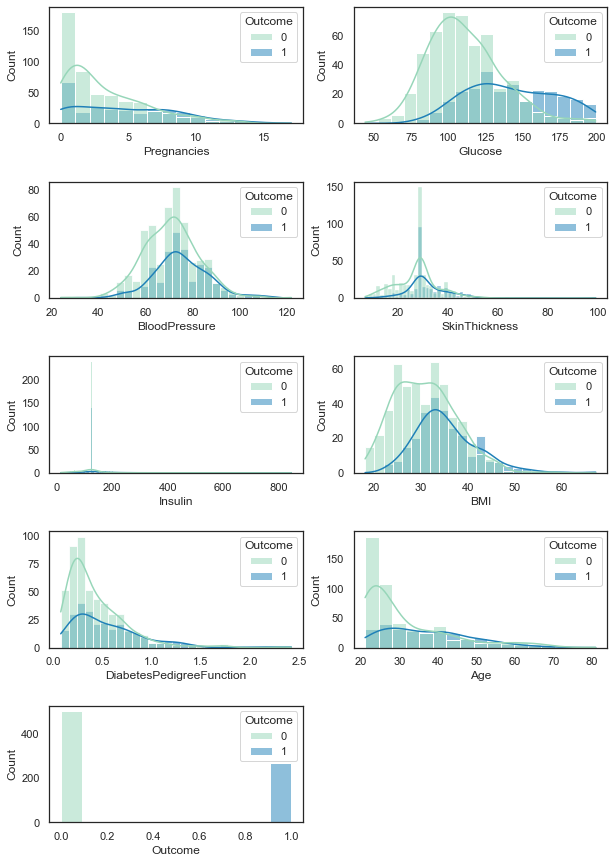

In [16]:
plt.figure(figsize=(10,15))
sns.set(font_scale = 1)
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=0.5)
i = 1;
for name in data.columns:
    plt.subplot(5,2,i)
    sns.histplot(data=data, x=name, hue="Outcome",kde=True,palette="YlGnBu")
    i = i + 1

##**Inference:**

After removing the null value , we can clearly see the difference 
*  For instance , In age column after removal of the null values, we can see that there is a spike at the range of 50 to 100 which is quite logical as well.

In [17]:
import missingno as msno
msno.bar(data, figsize=(12,5), fontsize=10, color="dodgerblue")
#using msno to understand the distribution of missing values through informative visualizations

ModuleNotFoundError: No module named 'missingno'

##**Inference:**

There is no null value in the dataset

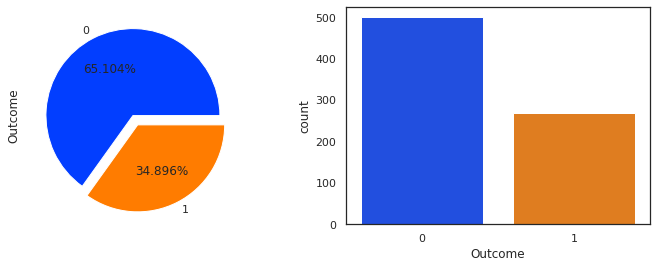

In [ ]:
f,ax=plt.subplots(1,2, figsize=(12,4))
data.Outcome.value_counts().plot.pie(explode=[0,0.12],autopct='%1.3f%%',ax=ax[0])
sns.countplot('Outcome',data=data)
plt.show()

##**Inference:**
 * There are 65.104 1’s (diabetic) and 34.896% 0’s (nondiabetic) in the data
 * Dataset is completely imbalanced in fact the number of patients who are diabetic is half of the patients who are non-diabetic.

Text(0.5, 1.0, 'Boxplot for Pregnancies by Outcome')

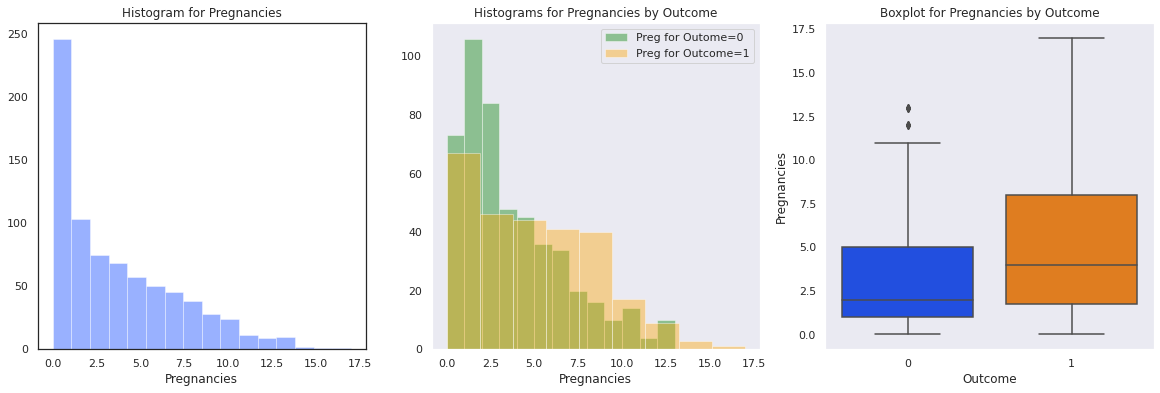

In [ ]:
#Histogram for Pregnancies  
plt.figure(figsize=(20, 6))

plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for Pregnancies")
sns.distplot(data.Pregnancies,kde=False)

#Segmented by Outcome 
plt.subplot(1,3,2)
sns.distplot(data[data.Outcome == 0].Pregnancies,kde=False,color="Green", label="Preg for Outome=0")
sns.distplot(data[data.Outcome == 1].Pregnancies,kde=False,color = "Orange", label = "Preg for Outcome=1")
plt.title("Histograms for Pregnancies by Outcome")
plt.legend()

#Same Segementation using boxplot 
plt.subplot(1,3,3)
sns.boxplot(x=data.Outcome,y=data.Pregnancies)
plt.title("Boxplot for Pregnancies by Outcome")

##**Inference:**
 - Visually , data is right skewed
 - As for the second graph , it shows that the pregnant women are more likely to have diabetes than the non-pregnant women.
 - In the boxplots, we find few outliers in non-diabetic women.

Text(0.5, 1.0, 'Boxplot for Glucose by Outcome')

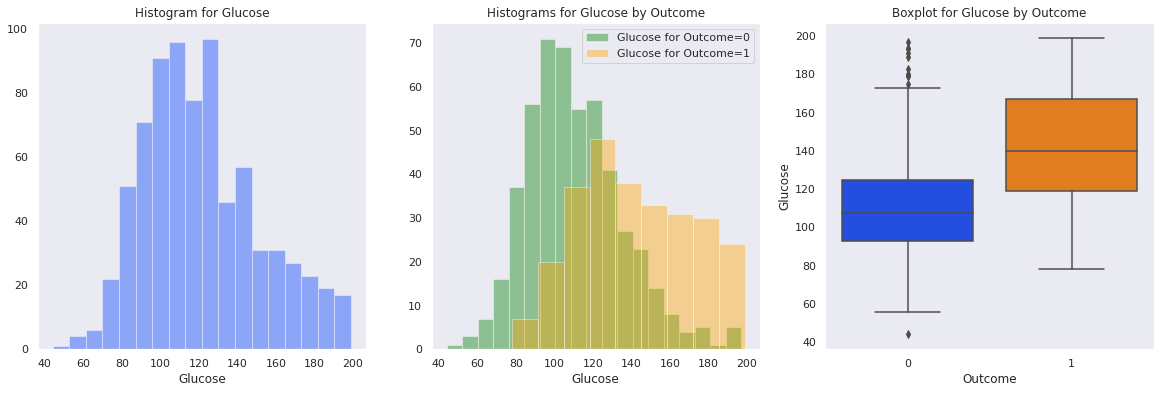

In [ ]:
#Histogram for Pregnancies  
plt.figure(figsize=(20, 6))

plt.subplot(1,3,1)
plt.title("Histogram for Glucose")
sns.distplot(data.Glucose, kde=False)


plt.subplot(1,3,2)
sns.distplot(data[data.Outcome == 0].Glucose,kde=False,color="Green", label="Glucose for Outcome=0")
sns.distplot(data[data.Outcome == 1].Glucose, kde=False, color="Orange", label = "Glucose for Outcome=1")
plt.title("Histograms for Glucose by Outcome")
plt.legend()


plt.subplot(1,3,3)
sns.boxplot(x=data.Outcome,y=data.Glucose)
plt.title("Boxplot for Glucose by Outcome")

##**Inference:**
- For the first graph we could see that the data is slidghtly skewed to the right , Understandably, the data set contains over 60% who are diabetic and its likely that their Glucose levels were higher.
- Clearly diabetic group has higher glucose than non-diabetic 
- In the boxplot, visually skewness seems acceptable (<2) and its also likely that confidence intervels of the means are not overlapping. So a hypothesis that Glucose is measure of outcome, is likely to be true.

Text(0.5, 1.0, 'Boxplot of BP by Outcome')

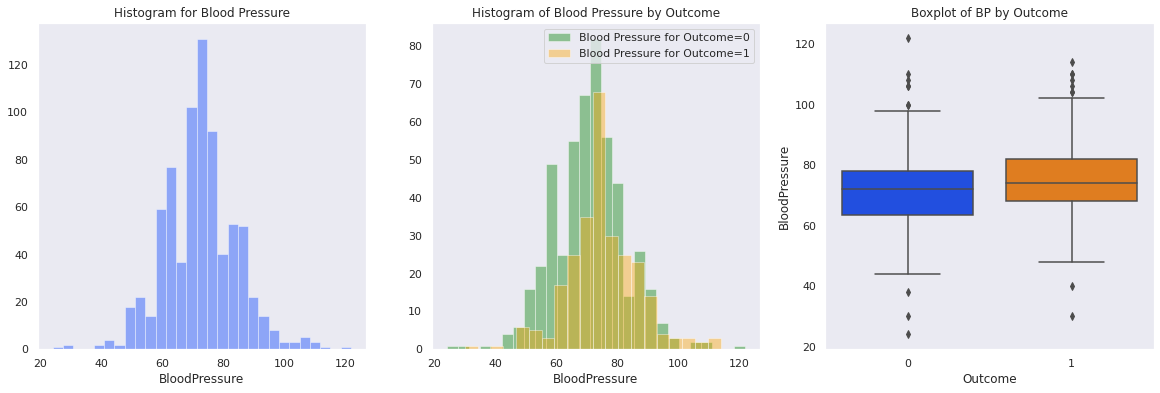

In [ ]:
#Plotting Blood Pressure graph 
plt.figure(figsize=(20, 6))

plt.subplot(1,3,1)
sns.distplot(data.BloodPressure, kde=False)
plt.title("Histogram for Blood Pressure")

plt.subplot(1,3,2)
sns.distplot(data[data.Outcome == 0].BloodPressure,kde=False,color="Green",label="Blood Pressure for Outcome=0")
sns.distplot(data[data.Outcome == 1].BloodPressure,kde=False, color="Orange", label="Blood Pressure for Outcome=1")
plt.legend()
plt.title("Histogram of Blood Pressure by Outcome")

plt.subplot(1,3,3)
sns.boxplot(x=data.Outcome,y=data.BloodPressure)
plt.title("Boxplot of BP by Outcome")

In [ ]:
df.BloodPressure.mean()

69.10546875

##**Inference:**
-  Distribution looks normal for the first graph. Mean value is 69, well within normal values for diastolic of 80.
- People who has the diabetes seems to have high blood pressure 
- People who has the diabetes are more likely to have high blood pressure than the non-diabetic one.
- Few outliers in the data. Its likely that some people have low and some have high blood pressure . So the association between the outcome and blood pressure is in noticable stage

Text(0.5, 1.0, 'Boxplot of SkinThickness by Outcome')

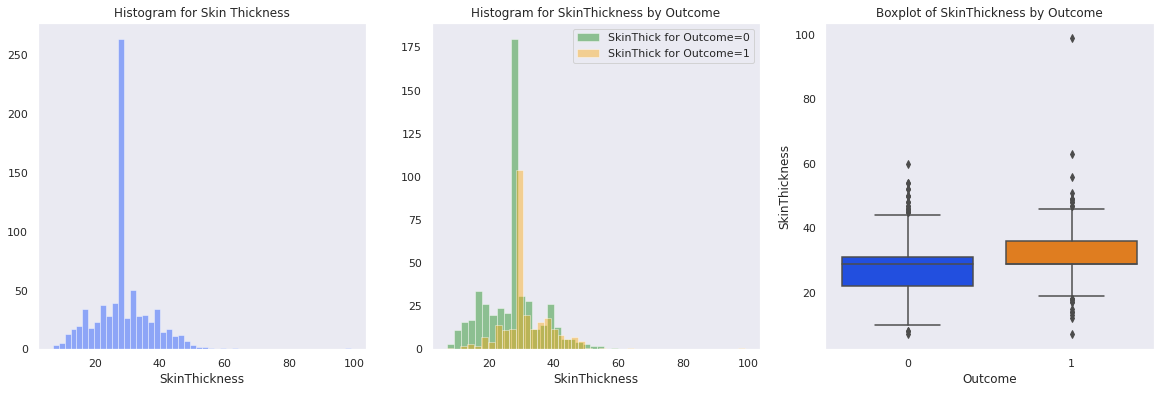

In [ ]:
#Plotting SKin Thickness graph 

plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.distplot(data.SkinThickness, kde=False)
plt.title("Histogram for Skin Thickness")

plt.subplot(1,3,2)
sns.distplot(data[data.Outcome == 0].SkinThickness, kde=False, color="Green", label="SkinThick for Outcome=0")
sns.distplot(data[data.Outcome == 1].SkinThickness, kde=False, color="Orange", label="SkinThick for Outcome=1")
plt.legend()
plt.title("Histogram for SkinThickness by Outcome")

plt.subplot(1,3,3)
sns.boxplot(x=data.Outcome, y=data.SkinThickness)
plt.title("Boxplot of SkinThickness by Outcome")

In [ ]:
df.SkinThickness.mean()

20.536458333333332

## **Inference:**

- Skin thickness seems be be skewed a bit.With the mean around 21
- As for the second graph, People who are not diabetic have lower skin thickness. This is a hypothesis that has to be validated. As data of non-diabetic is skewed but diabetic samples seems to be normally distributed.

Text(0.5, 1.0, 'Boxplot for Insulin by Outcome')

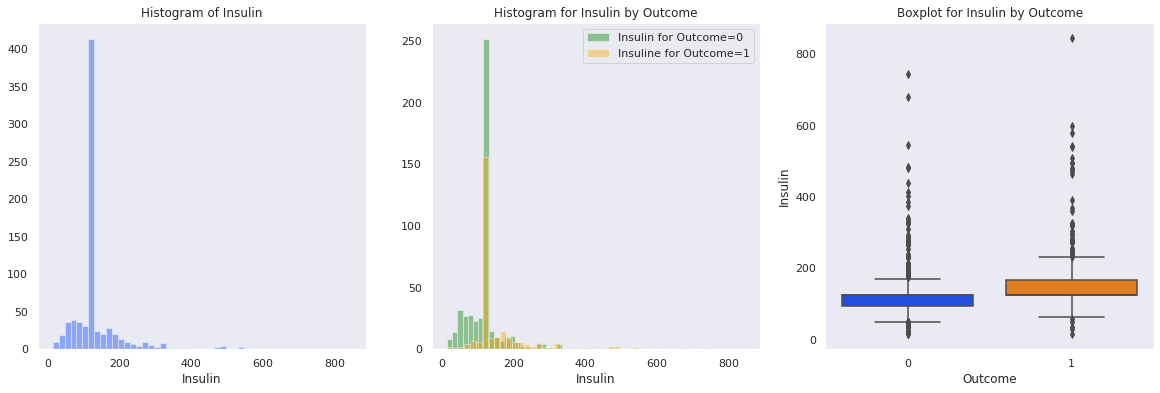

In [ ]:
#Plotting Insulin graph 
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.distplot(data.Insulin,kde=False)
plt.title("Histogram of Insulin")

plt.subplot(1,3,2)
sns.distplot(data[data.Outcome == 0].Insulin,kde=False, color="Green", label="Insulin for Outcome=0")
sns.distplot(data[data.Outcome == 1].Insulin,kde=False, color="Orange", label="Insuline for Outcome=1")
plt.title("Histogram for Insulin by Outcome")
plt.legend()

plt.subplot(1,3,3)
sns.boxplot(x=data.Outcome, y=data.Insulin)
plt.title("Boxplot for Insulin by Outcome")

## **Inference:**
Clearly there are Outliers in the data. These Outliers are concern for us and most of them with higher insulin values ar also diabetic. So this is a suspect.

Text(0.5, 1.0, 'Boxplot for BMI by Outcome')

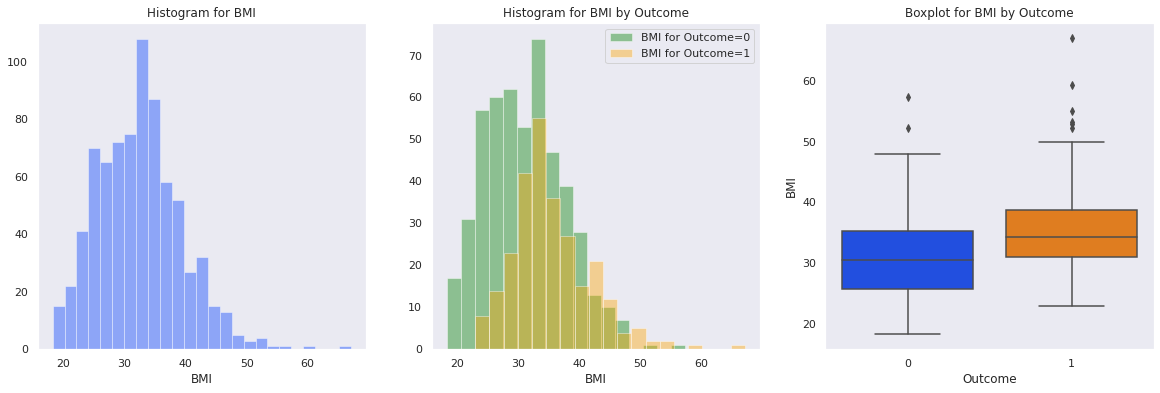

In [ ]:
#Plotting BMI graph 
plt.figure(figsize=(20, 6))

plt.subplot(1,3,1)
sns.distplot(data.BMI, kde=False)
plt.title("Histogram for BMI")

plt.subplot(1,3,2)
sns.distplot(data[data.Outcome == 0].BMI, kde=False,color="Green", label="BMI for Outcome=0")
sns.distplot(data[data.Outcome == 1].BMI, kde=False, color="Orange", label="BMI for Outcome=1")
plt.legend()
plt.title("Histogram for BMI by Outcome")

plt.subplot(1,3,3)
sns.boxplot(x=data.Outcome, y=data.BMI)
plt.title("Boxplot for BMI by Outcome")

## **Inference:**
 - There are few outliers for both with and non-diabetic people 
 - Diabetic people seems to be only higher side of BMI.

Text(0.5, 1.0, 'Boxplot for DiabetesPedigreeFunction by Outcome')

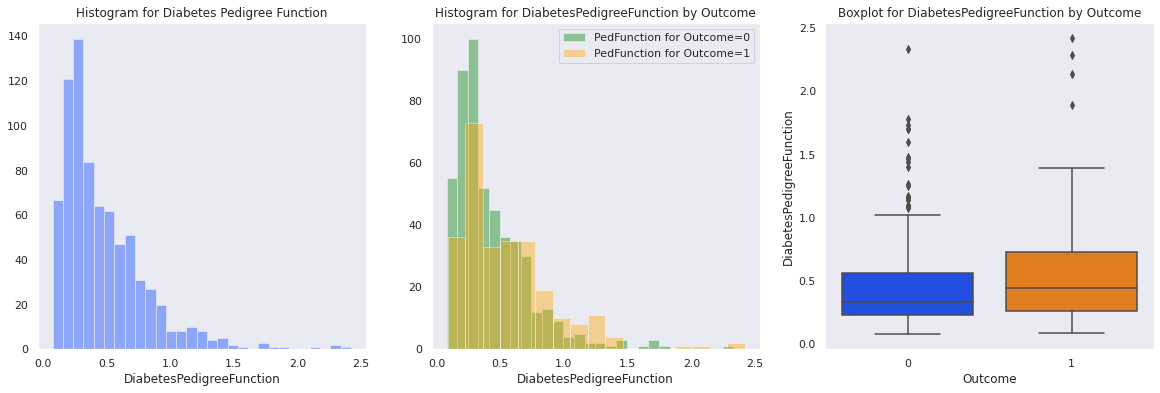

In [ ]:
#Plotting iabetesPedigreeFunction graph 
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.distplot(data.DiabetesPedigreeFunction,kde=False)
plt.title("Histogram for Diabetes Pedigree Function")

plt.subplot(1,3,2)
sns.distplot(data[data.Outcome == 0].DiabetesPedigreeFunction, kde=False, color="Green", label="PedFunction for Outcome=0")
sns.distplot(data[data.Outcome == 1].DiabetesPedigreeFunction, kde=False, color="Orange", label="PedFunction for Outcome=1")
plt.legend()
plt.title("Histogram for DiabetesPedigreeFunction by Outcome")

plt.subplot(1,3,3)
sns.boxplot(x=data.Outcome, y=data.DiabetesPedigreeFunction)
plt.title("Boxplot for DiabetesPedigreeFunction by Outcome")

## **Inference:**

 - the data is skewed and there are outliers in both diabetic and non-diabetic Category of people 
 - As Diabetes PedigreeFuction increases, there seems to be a likelihood of being diabetic.

Text(0.5, 1.0, 'Boxplot for Age by Outcome')

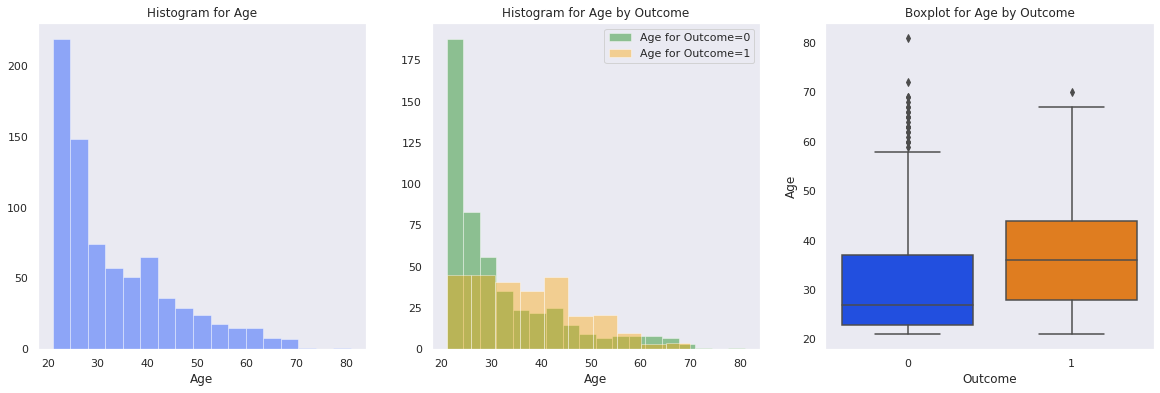

In [ ]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.distplot(data.Age,kde=False)
plt.title("Histogram for Age")

plt.subplot(1,3,2)
sns.distplot(data[data.Outcome == 0].Age,kde=False,color="Green", label="Age for Outcome=0")
sns.distplot(data[data.Outcome == 1].Age,kde=False, color="Orange", label="Age for Outcome=1")
plt.legend()
plt.title("Histogram for Age by Outcome")

plt.subplot(1,3,3)
sns.boxplot(x=data.Outcome,y=data.Age)
plt.title("Boxplot for Age by Outcome")

In [ ]:
feature_names = [cname for cname in data.loc[:,:'Age'].columns]

df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## **Inference:**

Age is skewed. There is a tendency that as people age, they are likely to become diabetic. This needs statistical validation
But diabetes, itself doesn’t seem to have an influence of longetivity.

Text(0.5, 1.0, 'Pairplot of Variables by Outcome')

<Figure size 2880x1080 with 0 Axes>

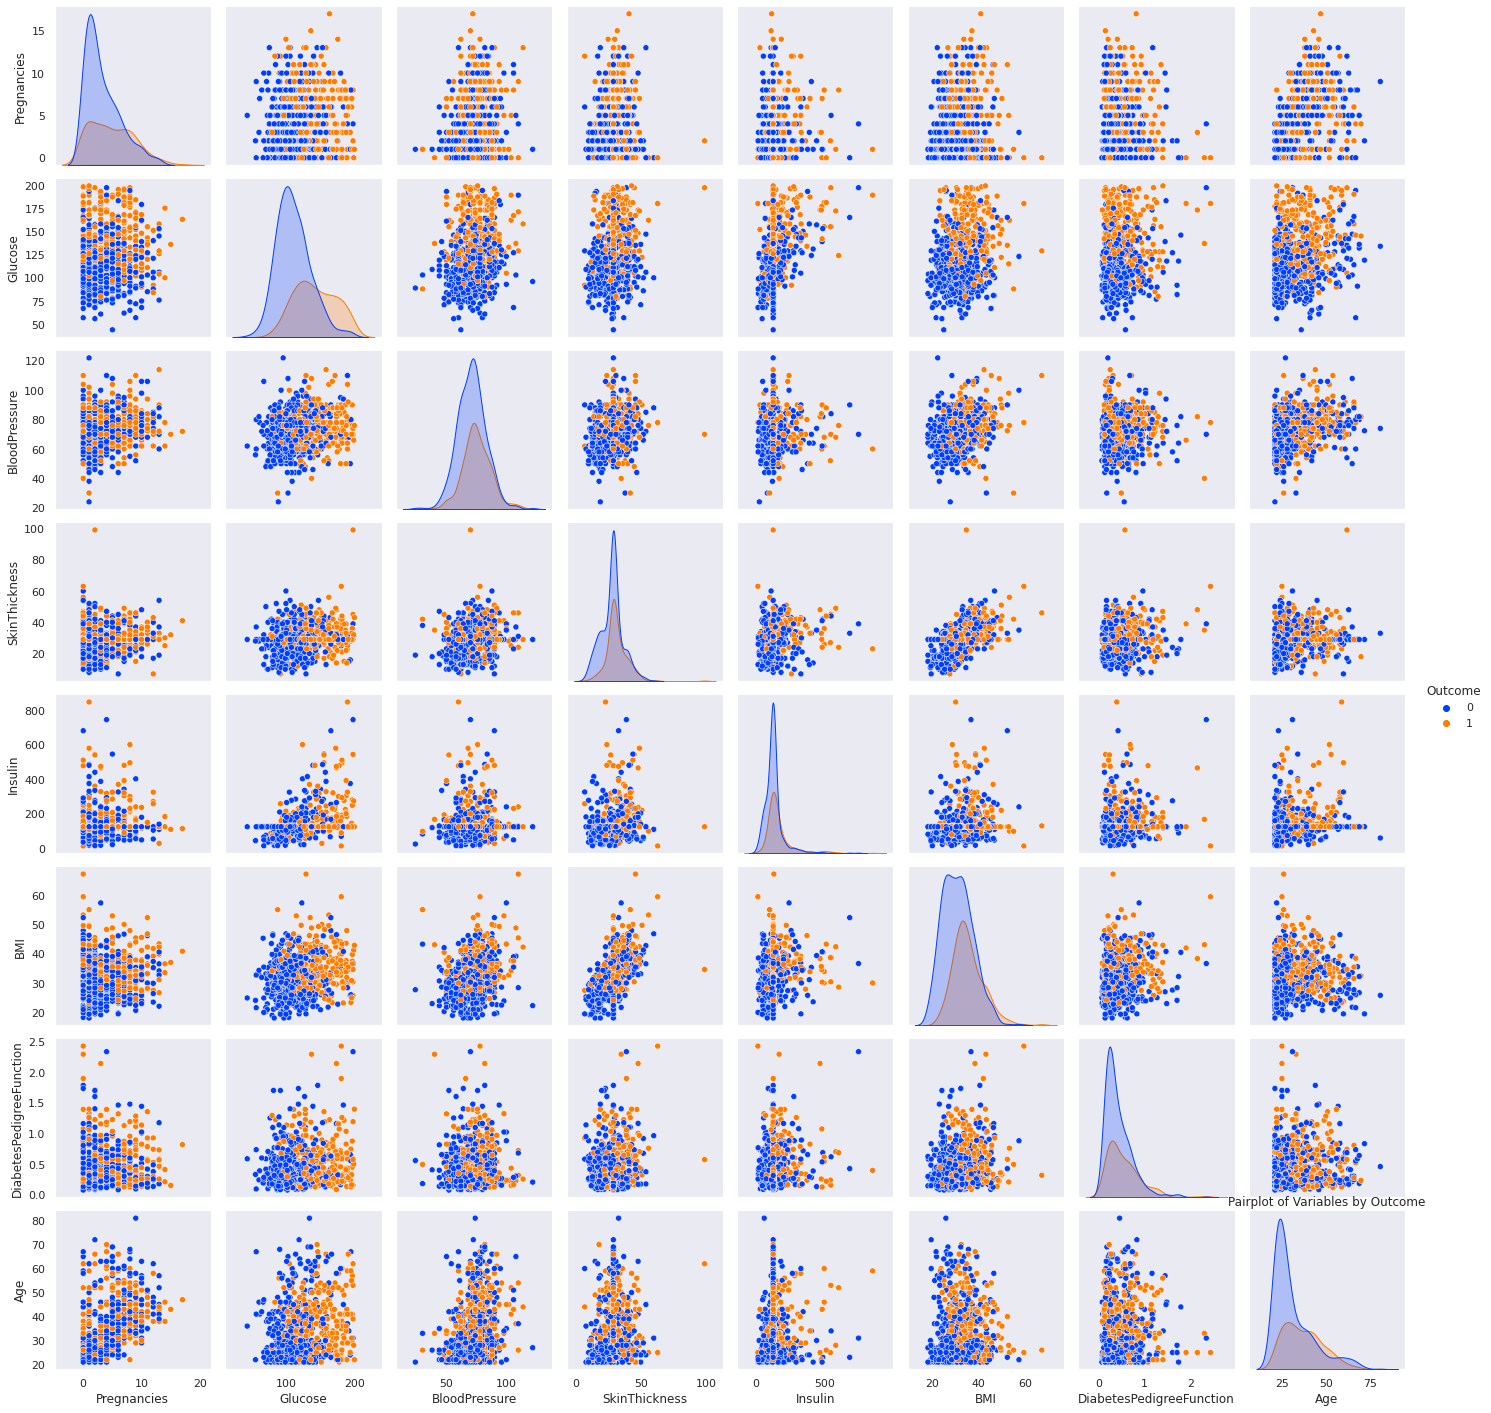

In [ ]:
#Scatterplot
plt.figure(figsize=(40, 15))
sns.pairplot(data, vars=["Pregnancies", "Glucose","BloodPressure","SkinThickness","Insulin", "BMI","DiabetesPedigreeFunction", "Age"],hue="Outcome")
plt.title("Pairplot of Variables by Outcome")

## **Inference:**
From scatter plots,we can see that there is no non-linear relationships and only BMI , SkinThickness, Pregnancies ,and Age seem to have positive linear relationships. while Glucose and Insulin likly suspect.


In [ ]:
#Compute Pearson correlation coefficient between numerical fields
pearson = data.corr(method ='pearson')
pearson

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192686,0.419064,0.231128,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.191853,0.045087,0.281199,-0.002763,0.324595,0.166074
SkinThickness,0.081770,0.192686,0.191853,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419064,0.045087,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231128,0.281199,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


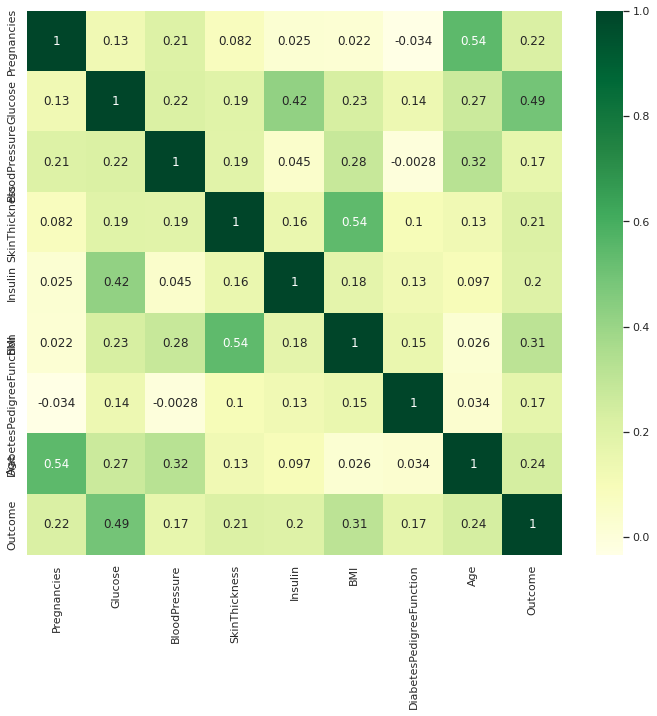

In [ ]:
#Heatmap
sns.heatmap(pearson , annot=True, cmap="YlGn")
plt.gcf().set_size_inches(12, 10)

## **Inference:**

- The correlation between Outcome and Glucose is high. Glucoe seems to be the most important feature in model training.
- BMI, Pregnancys, and Age are also expected to be used as important features in model training.
- High correlation coefficient with SkinThickness and BMI. There may be a multicollinearity problem.
- Age is highly correlated with Pregnancies is quiet true because as in biology a women who are above likly to be married and start considering having a baby .

#**Data Preprocessing**

Scaling

In [ ]:
#set the output and input variable 
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [ ]:
#Before Scaling 
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [ ]:
#Apply Standardization 
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(X))

In [ ]:
#Afer Scaling 
x.head()

,0,1,2,3,4,5,6,7
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


## **Training**


In [ ]:
#Splitting the data 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1, random_state = 0)

###Ramdom Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
rfc_train = rfc.predict(x_train)
from sklearn import metrics
print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))

Accuracy_Score = 1.0


In [ ]:
#Print Prediction Score 
rfc_predictions = rfc.predict(x_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, rfc_predictions)))

Accuracy_Score = 0.7922077922077922


In [ ]:
#print the Classificatoin report and confusion matrix of ramdom forest model 
print(confusion_matrix(y_test, rfc_predictions))
print(classification_report(y_test,rfc_predictions))

[[44  7]
 [ 9 17]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        51
           1       0.71      0.65      0.68        26

    accuracy                           0.79        77
   macro avg       0.77      0.76      0.76        77
weighted avg       0.79      0.79      0.79        77



In [ ]:
# Get the important feature
rfc.feature_importances_

array([0.08341518, 0.24592482, 0.08330744, 0.07075991, 0.08888537,
       0.15827686, 0.12608592, 0.1433445 ])

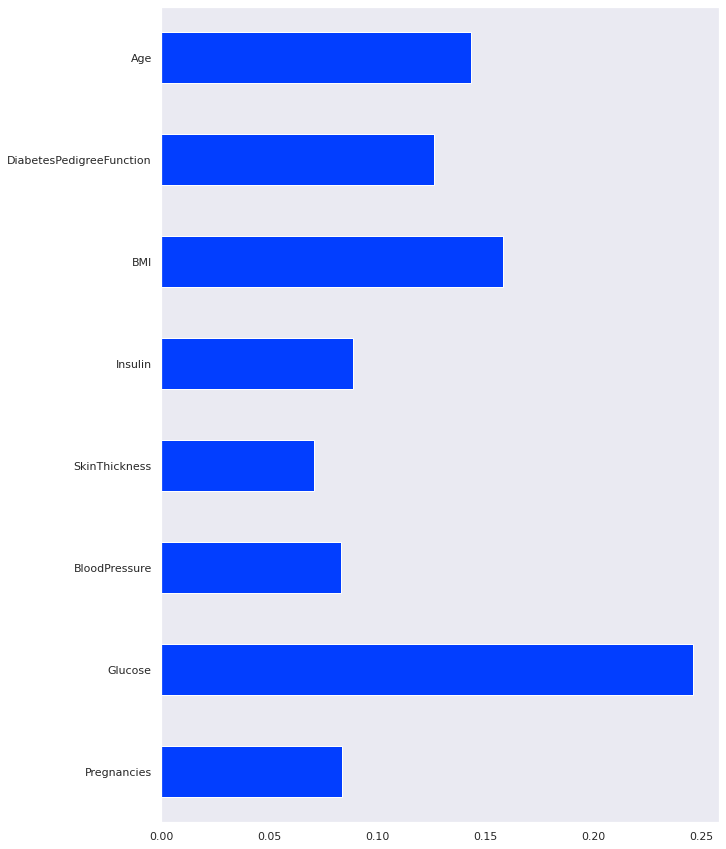

In [ ]:
(pd.Series(rfc.feature_importances_, index=X.columns).plot(kind='barh'))

## **Inference:**

Here from the above graph, it is clearly visible that 
 - Glucose as a feature is the most important in this dataset.
 - SkinThickness has the low important 

###Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
#Customize 
customize_lr = LogisticRegression(solver='liblinear', penalty='l1').fit(x_train,y_train)
#Using Default 
default_lr = LogisticRegression().fit(x_train,y_train)

In [ ]:
#Print Prediction Score 
customize_lr_prediction = customize_lr.predict(x_test)
default_lr_prediction = default_lr.predict(x_test)

print("************************* Accuracy of ************************* ")
print("----------------------------------------------------------------")
print("Customize Logistic Regression =", format(metrics.accuracy_score(y_test, customize_lr_prediction)))
print("----------------------------------------------------------------")
print("Default Value LOgistic Regression =", format(metrics.accuracy_score(y_test, customize_lr_prediction)))

************************* Accuracy of ************************* 
----------------------------------------------------------------
Customize Logistic Regression = 0.8571428571428571
----------------------------------------------------------------
Default Value LOgistic Regression = 0.8571428571428571


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
dtree_prediction = dtree.predict(x_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,dtree_prediction)))

Accuracy Score = 0.7532467532467533


### MLPRegressor

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
MLP = MLPRegressor(hidden_layer_sizes=(100,),
                    solver='adam',
                    learning_rate='constant',
                    learning_rate_init=0.1,
                    max_iter=500,
                    activation='relu',
                    early_stopping=True

)
MLP

MLPRegressor(early_stopping=True, hidden_layer_sizes=(100, 100),
             learning_rate_init=0.1, max_iter=1000)

In [ ]:
MLP.fit(x_train,y_train)

MLPRegressor(early_stopping=True, hidden_layer_sizes=(100, 100),
             learning_rate_init=0.1, max_iter=1000)

In [ ]:
MLP_prediction = MLP.predict(x_test)
MLP_prediction

array([0.32770112, 0.32770112, 0.32770112, 0.32770112, 0.32770112,
       0.32770112, 0.32770112, 0.32770112, 0.32770112, 0.32770112,
       0.32770112, 0.32770112, 0.32770112, 0.32770112, 0.32770112,
       0.32770112, 0.32770112, 0.32770112, 0.32770112, 0.32770112,
       0.32770112, 0.32770112, 0.32770112, 0.32770112, 0.32770112,
       0.32770112, 0.32770112, 0.32770112, 0.32770112, 0.32770112,
       0.32770112, 0.32770112, 0.32770112, 0.32770112, 0.32770112,
       0.32770112, 0.32770112, 0.32770112, 0.32770112, 0.32770112,
       0.32770112, 0.32770112, 0.32770112, 0.32770112, 0.32770112,
       0.32770112, 0.32770112, 0.32770112, 0.32770112, 0.32770112,
       0.32770112, 0.32770112, 0.32770112, 0.32770112, 0.32770112,
       0.32770112, 0.32770112, 0.32770112, 0.32770112, 0.32770112,
       0.32770112, 0.32770112, 0.32770112, 0.32770112, 0.32770112,
       0.32770112, 0.32770112, 0.32770112, 0.32770112, 0.32770112,
       0.32770112, 0.32770112, 0.32770112, 0.32770112, 0.32770

In [ ]:
mae = metrics.mean_absolute_error(y_test, MLP_prediction)
r2 = metrics.r2_score(y_test, MLP_prediction)


print('Mean absolute error: ', mae)
print("-----------------------------------------")
print('R2 score: ', r2)

Mean absolute error:  0.444058805670075
-----------------------------------------
R2 score:  -0.00044367265092093433


In [ ]:
print("Performance of model based on the test data:", MLP.score(x_test, y_test))

Performance of model based on the test data: -0.00044367265092093433


In [ ]:
pip install pycaret --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 10.3 MB/s 
     |████████████████████████████████| 15.3 MB 50.4 MB/s 
     |████████████████████████████████| 636 kB 59.8 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 271 kB 48.2 MB/s 
     |████████████████████████████████| 14.8 MB 43.8 MB/s 
     |████████████████████████████████| 1.7 MB 38.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.7 MB 62.8 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.2.2-py2.py3-none-any.whl size=135617 sha256=dca9a8b897762b3f9fb9490ee1c05659ec8c963af64e9f6e47bbc606c03608da
  Stored in directory: /root/.cache/pip/wheels/f8/b1/9b/560ac1931796b7303f7b517b949d2d31a4fbc512aad3b9f284
Su

In [ ]:
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
flask-simplelogin 0.1.1 requires click<9.0.0,>=8.0.1, but you have click 7.1.2 which is incompatible.
explainerdashboard 0.3.8.2 requires graphviz>=0.18.2, but you have graphviz 0.10.1 which is incompatible.
autoviz 0.1.42 requires matplotlib>=3.3.3, but you have matplotlib 3.2.2 which is incompatible.


In [ ]:
import jinja2
from pycaret.classification import *

In [ ]:
clf1 = setup(data = data, 
             target = 'Outcome',
             preprocess = False,
             silent = True)

RuntimeError: ignored

In [ ]:
data.info()

In [ ]:
#Compare the models 
all_algo = compare_models(sort='AUC',
                      n_select = 5,
                    )

In [ ]:
top5 = compare_models(sort='AUC',
                      n_select = 5,
                      exclude=['lightgbm','dummy','svm','rf','knn','dt','nb','dt','ada','gbc']
                     )